### Encoder and GAN

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()

2025-05-18 15:41:54.735132: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-18 15:41:55.750627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = X_train.astype(np.float16) / 255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))

X_test = X_test.astype(np.float16) / 255
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoded_dim = 32 
input_img = Input(shape=(784,))

encoded = Dense(encoded_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded) 

2025-05-18 15:41:58.507504: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-18 15:41:58.698273: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Prepere seprable model for encoder and decoder

In [ ]:
encoder = Model(input_img, encoded) 

encoded_input = Input(shape=(encoded_dim,))  

decoder_layer = autoencoder.layers[-1] 

decoder = Model(encoded_input, decoder_layer(encoded_input)) 

In [5]:
autoencoder.compile(
    loss='binary_crossentropy',
    optimizer='adam')

autoencoder.fit(
    X_train,
    X_train,
    batch_size=32,
    epochs=12,
    validation_data=(X_test, X_test)
)


Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2238 - val_loss: 0.1124
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1080 - val_loss: 0.0964
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0968 - val_loss: 0.0939
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0951 - val_loss: 0.0933
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0944 - val_loss: 0.0929
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0939 - val_loss: 0.0929
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0937 - val_loss: 0.0927
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0937 - val_loss: 0.0926
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0935 - val_loss: 0.0924
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0936 - val_loss: 0.0924
Epoch 12/12
1875/1875 ━━━━━━━━

In [6]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


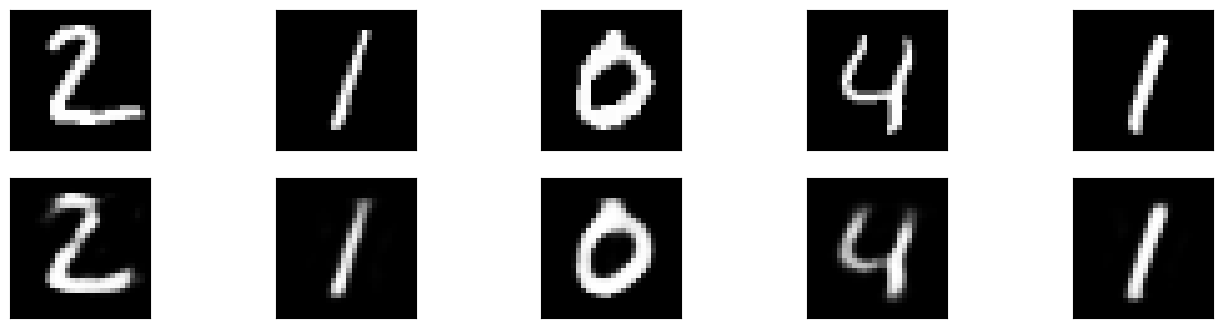

In [7]:
import matplotlib.pyplot as plt
 
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolution autoencoder

In [8]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype(np.float16)/255
X_train = X_train.reshape(len(X_train), 28, 28, 1)

X_test = X_test.astype(np.float16)/255
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [9]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Encoder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, decoded)

autoencoder.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

autoencoder.fit(
    X_train,
    X_train,
    batch_size=32,
    
    epochs=3,
    validation_data=(X_test, X_test)
)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - loss: 0.2196 - val_loss: 0.1217
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.1171 - val_loss: 0.1089
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1090 - val_loss: 0.1046


In [10]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


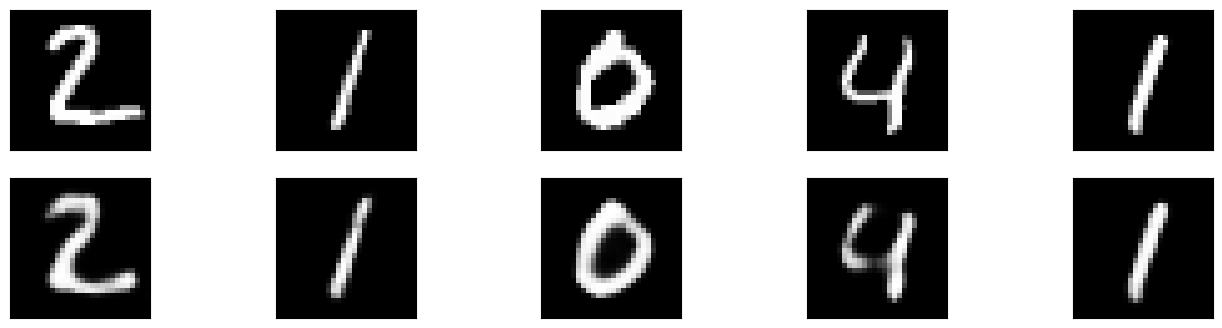

In [11]:
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()